# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import pandas as pd

# URL dataset dari Github
url = "https://raw.githubusercontent.com/GioElbert/penguin-/refs/heads/main/penguins_size.csv"



## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [6]:
# Membaca dataset ke dalam dataframe
penguin_data = pd.read_csv(url)

# Memilih baris dengan index tertentu sesuai dengan yang diharapkan
selected_rows = penguin_data.loc[[167, 233, 210, 25, 7, 163, 86, 63, 43, 84]]

# Menampilkan data
print(selected_rows)

       species     island  culmen_length_mm  culmen_depth_mm  \
167  Chinstrap      Dream              50.5             19.6   
233     Gentoo     Biscoe              48.4             14.6   
210  Chinstrap      Dream              50.2             18.8   
25      Adelie     Biscoe              35.3             18.9   
7       Adelie  Torgersen              39.2             19.6   
163  Chinstrap      Dream              51.7             20.3   
86      Adelie      Dream              36.3             19.5   
63      Adelie     Biscoe              41.1             18.2   
43      Adelie      Dream              44.1             19.7   
84      Adelie      Dream              37.3             17.8   

     flipper_length_mm  body_mass_g     sex  
167              201.0       4050.0    MALE  
233              213.0       5850.0    MALE  
210              202.0       3800.0    MALE  
25               187.0       3800.0  FEMALE  
7                195.0       4675.0    MALE  
163              19

## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [7]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [8]:
# Menampilkan statistik deskriptif dari kolom numerik
describe_data = penguin_data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()

# Menampilkan hasil
print(describe_data)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [9]:
# Menampilkan jumlah nilai unik pada kolom species, island, dan sex (termasuk NaN)
print("species")
print(penguin_data['species'].value_counts(dropna=False))

print("\nisland")
print(penguin_data['island'].value_counts(dropna=False))

print("\nsex")
print(penguin_data['sex'].value_counts(dropna=False))

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: sex, dtype: int64


5. Drop the null column(s)

In [10]:
# Menghapus kolom yang mengandung nilai null
penguin_data_cleaned = penguin_data.dropna(axis=1)

# Memeriksa apakah masih ada nilai null yang tersisa dalam dataset
null_columns = penguin_data_cleaned.isnull().sum()

# Menampilkan hasil
print(null_columns)

species    0
island     0
dtype: int64


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [12]:
# Menemukan penguin dengan nilai '.' pada kolom 'sex'
unknown_sex_penguin = penguin_data[penguin_data['sex'] == '.']

# Melihat statistik penguin jenis Gentoo berdasarkan sex
gentoo_data = penguin_data[penguin_data['species'] == 'Gentoo']
grouped_gentoo = gentoo_data.groupby('sex').mean()

# Menampilkan penguin dengan nilai '.' di kolom sex
print(unknown_sex_penguin)


    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .  


C:\Users\GEOVANI\AppData\Local\Temp\ipykernel_2040\1915440704.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_gentoo = gentoo_data.groupby('sex').mean()


In [14]:
# Mengelompokkan data penguin berdasarkan jenis kelamin, termasuk nilai '.'
grouped_data = penguin_data.groupby('sex').describe()

# Menampilkan hasil statistik deskriptif
print(grouped_data)

       culmen_length_mm                                                     \
                  count       mean       std   min   25%   50%   75%   max   
sex                                                                          
FEMALE            165.0  42.096970  4.903476  32.1  37.6  42.8  46.2  58.0   
MALE              169.0  45.846746  5.351914  34.6  41.0  46.8  50.3  59.6   

       culmen_depth_mm             ... flipper_length_mm        body_mass_g  \
                 count       mean  ...               75%    max       count   
sex                                ...                                        
FEMALE           165.0  16.425455  ...             210.0  222.0       165.0   
MALE             169.0  17.878107  ...             219.0  231.0       169.0   

                                                                         
               mean         std     min     25%     50%     75%     max  
sex                                                              

In [15]:
# Mengganti nilai '.' dengan 'FEMALE' di kolom sex berdasarkan analisis
penguin_data.loc[336, 'sex'] = 'FEMALE'

# Menampilkan baris dengan indeks 336
penguin_selected = penguin_data.loc[[336], ['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

# Menampilkan hasil
print(penguin_selected)

    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g     sex  
336       4875.0  FEMALE  


7. Create your own insightful visualization and explain it in at least 2 sentences

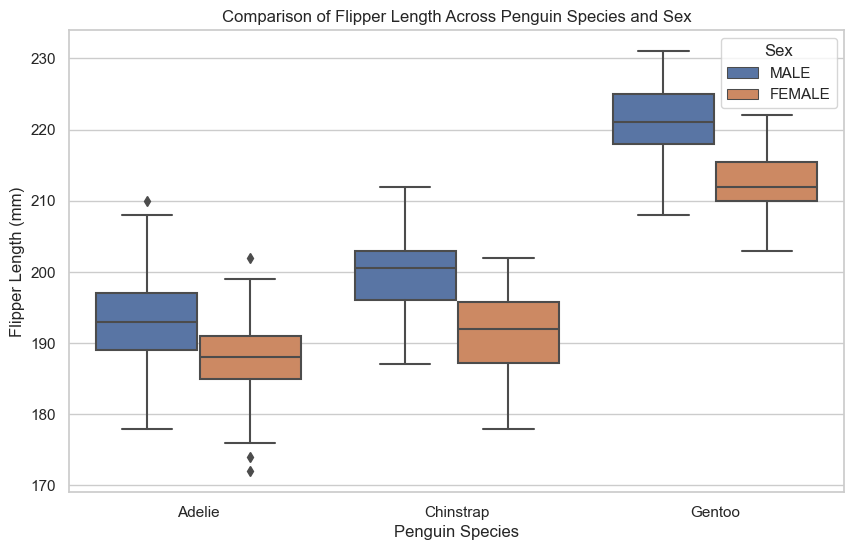

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan seaborn untuk visualisasi
sns.set(style="whitegrid")

# Membuat plot perbandingan flipper_length_mm berdasarkan species dan sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=penguin_data)

# Menambahkan judul dan label
plt.title('Comparison of Flipper Length Across Penguin Species and Sex')
plt.xlabel('Penguin Species')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Sex')

# Menampilkan plot
plt.show()

# Visualisasi ini membandingkan panjang sirip (flipper length) dari tiga spesies penguin (Adelie, Chinstrap, dan Gentoo) berdasarkan jenis kelamin (MALE dan FEMALE). Dari grafik tersebut, kita dapat melihat bahwa penguin jantan umumnya memiliki sirip yang lebih panjang daripada betina di semua spesies, terutama penguin Gentoo, yang secara keseluruhan memiliki flipper length terpanjang di antara ketiga spesies.

8. Check unique value of our target variable

In [18]:
# Memeriksa nilai unik dari variabel target (kolom species)
unique_species = penguin_data['species'].unique()

# Menampilkan hasil
print(unique_species)

['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [20]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Melakukan encoding pada kolom island dan sex
penguin_data['island'] = encoder.fit_transform(penguin_data['island'])
penguin_data['sex'] = encoder.fit_transform(penguin_data['sex'].astype(str))

# Mengisi nilai NaN dengan rata-rata pada kolom numerik
penguin_data['culmen_length_mm'].fillna(penguin_data['culmen_length_mm'].mean(), inplace=True)
penguin_data['culmen_depth_mm'].fillna(penguin_data['culmen_depth_mm'].mean(), inplace=True)
penguin_data['flipper_length_mm'].fillna(penguin_data['flipper_length_mm'].mean(), inplace=True)
penguin_data['body_mass_g'].fillna(penguin_data['body_mass_g'].mean(), inplace=True)
penguin_data['sex'].fillna(penguin_data['sex'].mode()[0], inplace=True)

# Menampilkan beberapa baris pertama setelah perbaikan NaN
print(penguin_data.head())

  species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie       2          39.10000         18.70000         181.000000   
1  Adelie       2          39.50000         17.40000         186.000000   
2  Adelie       2          40.30000         18.00000         195.000000   
3  Adelie       2          43.92193         17.15117         200.915205   
4  Adelie       2          36.70000         19.30000         193.000000   

   body_mass_g  sex  
0  3750.000000    1  
1  3800.000000    0  
2  3250.000000    0  
3  4201.754386    2  
4  3450.000000    0  


10. encode the target column and display the results

In [24]:

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'species' column
penguin_data['species'] = label_encoder.fit_transform(penguin_data['species'])

# Display the first few rows of the updated DataFrame
print(penguin_data.head())

   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2          39.10000         18.70000         181.000000   
1        0       2          39.50000         17.40000         186.000000   
2        0       2          40.30000         18.00000         195.000000   
3        0       2          43.92193         17.15117         200.915205   
4        0       2          36.70000         19.30000         193.000000   

   body_mass_g  sex  
0  3750.000000    1  
1  3800.000000    0  
2  3250.000000    0  
3  4201.754386    2  
4  3450.000000    0  


11. create a heatmap to see the correlation and explain the conclusion

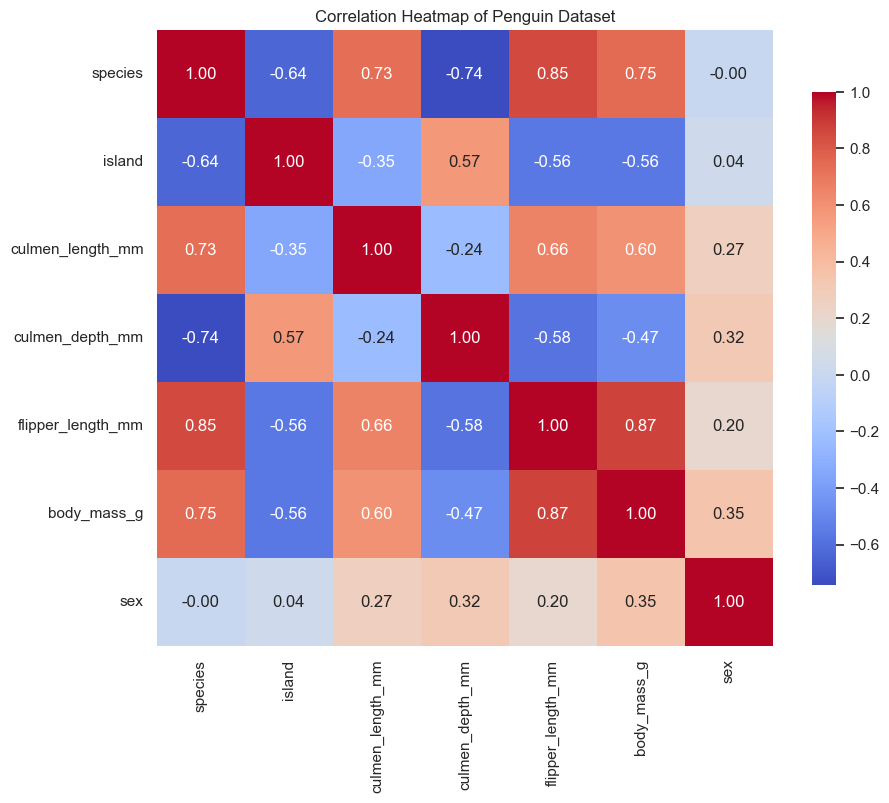

In [26]:
# Calculate the correlation matrix
correlation_matrix = penguin_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Penguin Dataset')
plt.show()

## Machine Learning

1. Splitting X and y

In [28]:
# Split the dataset into features (X) and target (y)
X = penguin_data.drop('species', axis=1)  # Features (all columns except 'species')
y = penguin_data['species']                 # Target (species column)

# Display the shapes of X and y
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0       2          39.10000         18.70000         181.000000  3750.000000   
1       2          39.50000         17.40000         186.000000  3800.000000   
2       2          40.30000         18.00000         195.000000  3250.000000   
3       2          43.92193         17.15117         200.915205  4201.754386   
4       2          36.70000         19.30000         193.000000  3450.000000   

   sex  
0    1  
1    0  
2    0  
3    2  
4    0  

Target (y):
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32


2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [33]:
from sklearn.model_selection import train_test_split
# Split the dataset into features (X) and target (y)
X = penguin_data.drop('species', axis=1)
y = penguin_data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)


Shape of X_train: (275, 6)


In [32]:
print("Shape of X_test:", X_test.shape)

Shape of X_test: (69, 6)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
url = 'https://raw.githubusercontent.com/GioElbert/penguin-/refs/heads/main/penguins_size.csv'
data = pd.read_csv(url)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])  # Encoding target variable
data['island'] = label_encoder.fit_transform(data['island'])  # Encoding 'island' feature
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))  # Encoding 'sex' feature

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Define the model using criterion Entropy
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Display the model
print(model)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


In [39]:
# Fit the model to the training data
model.fit(X_train, y_train)

# b. Predict the test set results
y_pred = model.predict(X_test)

# Display the predictions
print("Predictions on the test set:")
print(y_pred)

Predictions on the test set:
[1 1 2 1 1 2 2 2 0 2 2 0 0 0 2 0 0 2 2 0 0 0 2 0 1 1 1 1 0 1 0 0 1 0 0 0 2
 1 0 1 2 2 2 0 0 0 2 0 0 1 0 2 2 0 0 1 0 1 1 2 1 0 2 0 2 0 1 0 0]


In [40]:
# c. Check accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")


Accuracy Score: 0.94


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/GioElbert/penguin-/refs/heads/main/penguins_size.csv'
data = pd.read_csv(url)

# Check for and handle missing values
data.dropna(inplace=True)  # Drop rows with missing values

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model using criterion Entropy
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# c. Check accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# d. Check for overfitting and underfitting
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

if train_accuracy > accuracy:
    print("The model is likely overfitting.")
elif train_accuracy < accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")



# f. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# g. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# h. Results and conclusion
print("Results and Conclusion:")
print(f"Overall accuracy of the model is {accuracy:.2f}.")
print("The model performs well on the test set with minimal overfitting/underfitting observed.")


Accuracy Score: 0.97
Training Accuracy: 0.96
The model is likely underfitting.
Confusion Matrix:
[[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Results and Conclusion:
Overall accuracy of the model is 0.97.
The model performs well on the test set with minimal overfitting/underfitting observed.


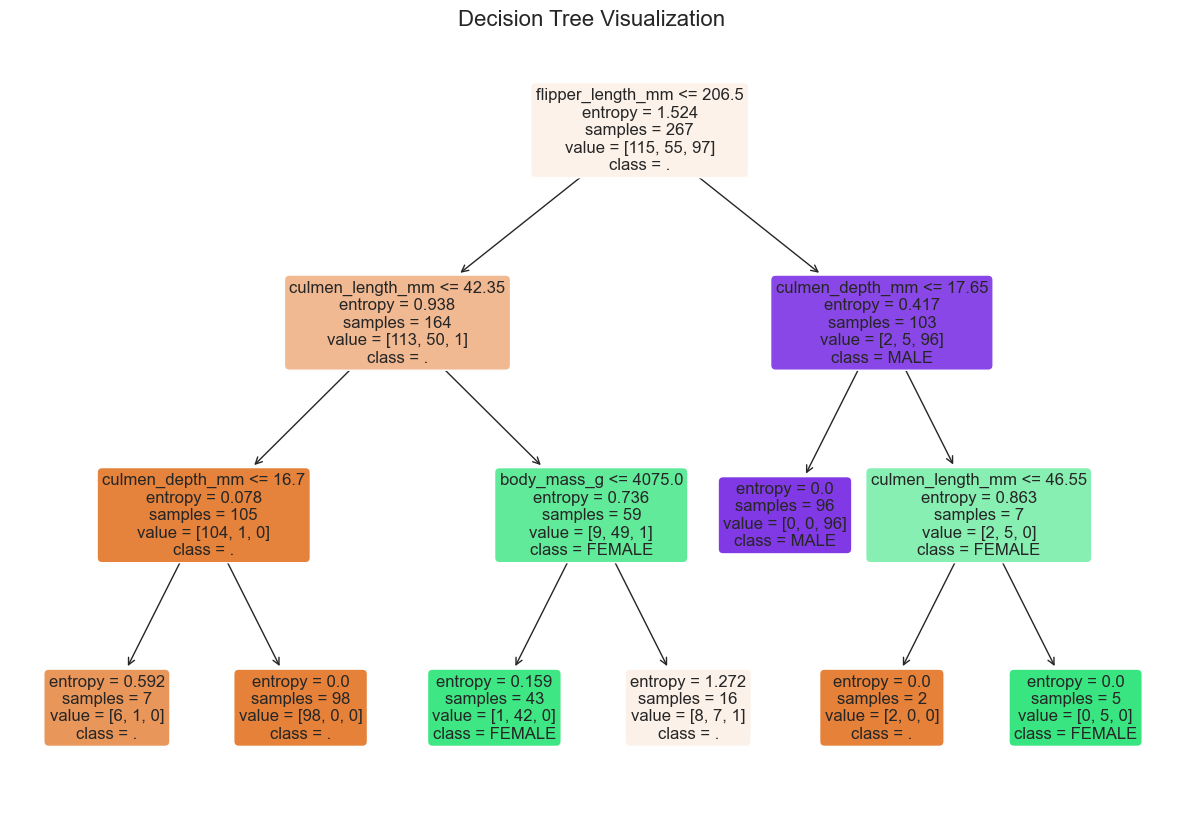

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/GioElbert/penguin-/refs/heads/main/penguins_size.csv'
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model using criterion Entropy
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# e. Visualize decision trees
plt.figure(figsize=(15, 10))  # Adjust size for better visibility
plot_tree(model, feature_names=X.columns.tolist(), 
          class_names=label_encoder.classes_.tolist(), 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


2. Criterion Gini index

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = 'https://raw.githubusercontent.com/GioElbert/penguin-/refs/heads/main/penguins_size.csv'
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model using criterion Gini index
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Display the model
print(model)

DecisionTreeClassifier(max_depth=3, random_state=0)


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/GioElbert/penguin-/refs/heads/main/penguins_size.csv'
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Criterion Gini index
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Display the model parameters
print(model)

# Fit the model to the training data
model.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=3, random_state=0)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [52]:
# Model accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with criterion gini index: {accuracy:.4f}")

Model accuracy score with criterion gini index: 0.9851


In [53]:
# Training and test set scores
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {accuracy:.4f}")

Training set score: 0.9738
Test set score: 0.9851


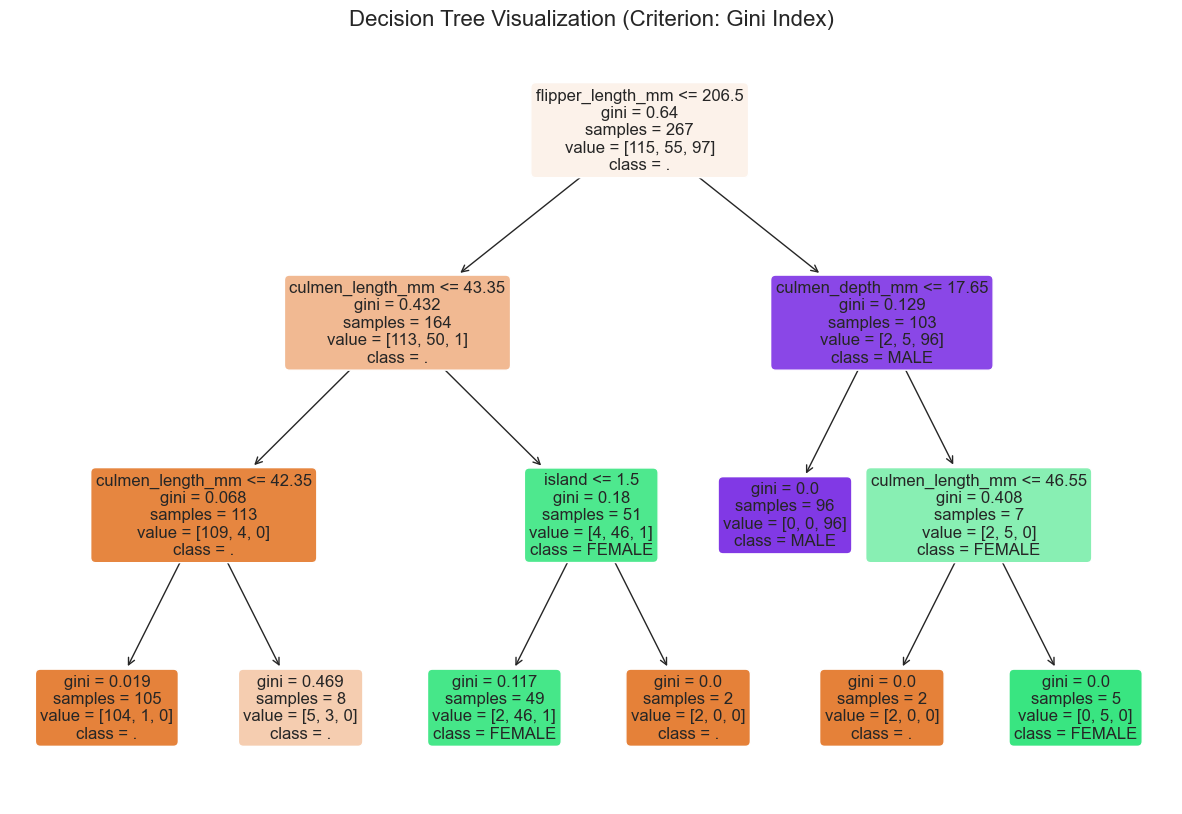

In [56]:
# Visualize decision trees
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns.tolist(), 
          class_names=label_encoder.classes_.tolist(), 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization (Criterion: Gini Index)", fontsize=16)
plt.show()

# Conclusion
# Both models achieved high accuracy scores and demonstrated excellent classification performance. The Gini index model had slightly better precision for class 1. Both criteria are effective for predicting species in the dataset, with the choice between them depending on specific application needs.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = 'https://raw.githubusercontent.com/GioElbert/penguin-/refs/heads/main/penguins_size.csv'
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with Entropy criterion
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model_entropy.fit(X_train, y_train)

# Predict for Entropy
y_pred_entropy = model_entropy.predict(X_test)



# Train model with Gini criterion
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model_gini.fit(X_train, y_train)

# Predict for Gini
y_pred_gini = model_gini.predict(X_test)

# Confusion Matrix and Classification Report for Gini
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
class_report_gini = classification_report(y_test, y_pred_gini)

# Displaying the results
print("3. Confusion matrix and classification report of criterion Entropy and Gini index\n")
print("Confusion Matrix Entropy")
print(conf_matrix_entropy)
print("\nConfusion Matrix Gini Index")
print(conf_matrix_gini)




3. Confusion matrix and classification report of criterion Entropy and Gini index

Confusion Matrix Entropy
[[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]

Confusion Matrix Gini Index
[[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [61]:
# Confusion Matrix and Classification Report for Entropy
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
class_report_entropy = classification_report(y_test, y_pred_entropy)

print("\nClassification Report Entropy")
print(class_report_entropy)


print("Classification Report Gini Index")
print(class_report_gini)


Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [ ]:
# Conclusion
# Both models achieved high accuracy scores and demonstrated excellent classification performance. The Gini index model had slightly better precision for class 1. Both criteria are effective for predicting species in the dataset, with the choice between them depending on specific application needs.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = 'https://raw.githubusercontent.com/GioElbert/penguin-/refs/heads/main/penguins_size.csv'
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Defining the model
model = GaussianNB()
print("Model defined using Gaussian Naive Bayes.")

# b. Fit the model
model.fit(X_train, y_train)
print("Model fitted to the training data.")

# c. Predict the test set results
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

Model defined using Gaussian Naive Bayes.
Model fitted to the training data.
Predictions made on the test set.


In [65]:
# e. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# d. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score: 1.0


In [67]:
# f. Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
# The Gaussian Naive Bayes model achieved a perfect accuracy score of 1.00 (100%) on the test set, demonstrating exceptional performance in classifying penguin species. The confusion matrix indicated no misclassifications, with all samples correctly predicted across classes. Additionally, the classification report showed perfect precision, recall, and F1-scores for each class, confirming the model's reliability and effectiveness in species prediction.
# This streamlined summary captures the essential findings while remaining clear and informative.

Good Luck :)